<a href="https://colab.research.google.com/github/VCosmo/VCosmo_Repo/blob/main/stack_PPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from gal4H0 import *
import pickle
from scipy.integrate import cumtrapz
import scipy

In [ ]:
cosmo=FlatLambdaCDM(H0=70.,Om0=0.25)

In [ ]:
def combine_H0(data_struct,ev_idx):
    pos_single=np.log(data_struct['single_pos'][ev_idx,:])
    combined=np.sum(pos_single,axis=0)
    combined-=combined.max()
    combined=np.exp(combined)
    combined/=np.trapz(combined,data_struct['H0_grid'])
    return combined


def pp_curve_2(CI,H0_posteriors,H0_grid,H0_truths,plotsigma=False,Nevents=None):
    Nrep=len(H0_posteriors['single_pos'])

    if Nevents is None:
        Nevents=H0_posteriors['single_pos'][0].shape[0]

    ci_fall=np.zeros(Nrep)
    for i in range(Nrep):
        pos_single=np.log(H0_posteriors['single_pos'][i])
        combined=np.sum(pos_single[:Nevents:],axis=0)
        combined-=combined.max()
        combined=np.exp(combined)
        combined/=np.trapz(combined,H0_grid)
        cumulative=cumtrapz(combined,H0_grid)
        ci_fall[i]=cumulative[np.digitize(H0_truths[i],H0_grid)-1]


    if plotsigma:
        for ci, alpha in zip([0.68, 0.95, 0.997],[0.1,0.15,0.2]):
            edge_of_bound = (1. - ci) / 2.
            lower = scipy.stats.binom.ppf(1 - edge_of_bound, Nrep, CI) / Nrep
            upper = scipy.stats.binom.ppf(edge_of_bound, Nrep, CI) / Nrep
            lower[0] = 0
            upper[0] = 0
            plt.fill_between(CI, lower, upper, alpha=alpha, color='k')

    cc = plt.hist(ci_fall,bins=np.linspace(0,1,len(H0_truths)),density='True',cumulative=True,alpha=0.)

    ppplot, edges = cc[0], cc[1]

    return ppplot,(edges[1::]+edges[:-1:])*0.5


FileNotFoundError: ignored

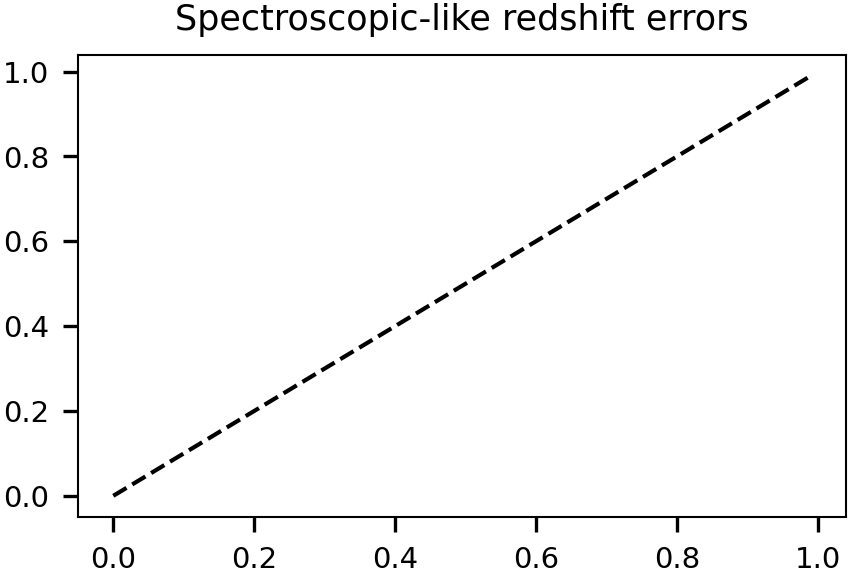

In [ ]:
plt.figure(figsize=(3.3,2.0))

H0_array=np.linspace(40,120,2000)

CI=np.linspace(0,0.99,1000)
plt.plot(CI,CI,ls='--',color='k')

plt.title('Spectroscopic-like redshift errors')

#stack 4 different data set of the same kind:

matrix1 = pickle.load(open('/pp-plots_data/6_0_20perc_acc_1.p', 'rb'))
matrix2 = pickle.load(open('/pp-plots_data/6_0_20perc_acc_2.p', 'rb'))
matrix3 = pickle.load(open('/pp-plots_data/6_0_20perc_acc_3.p', 'rb'))
matrix4 = pickle.load(open('/pp-plots_data/6_0_20perc_acc_4.p', 'rb'))

singlepos['true_H0'] = np.hstack((matrix1['true_H0'], matrix2['true_H0']))
singlepos['single_pos'] = np.vstack((matrix1['single_pos'], matrix2['single_pos']))

ppplot,ed=pp_curve_2(CI,singlepos,H0_array ,singlepos['true_H0'],plotsigma=True,Nevents=100)
plt.plot(ed,ppplot,color=pal[0],label=r'$D_{11}, \sigma_{d_L}/d_L=10\%$')
ppplot

matrix1 = pickle.load(open('/pp-plots_data/6_1_20perc_acc_1.p', 'rb'))
matrix2 = pickle.load(open('/pp-plots_data/6_1_20perc_acc_2.p', 'rb'))
matrix3 = pickle.load(open('/pp-plots_data/6_1_20perc_acc_3.p', 'rb'))
matrix4 = pickle.load(open('/pp-plots_data/6_1_20perc_acc_4.p', 'rb'))

singlepos['true_H0'] = np.hstack((matrix1['true_H0'], matrix2['true_H0']))
singlepos['single_pos'] = np.vstack((matrix1['single_pos'], matrix2['single_pos']))

ppplot,ed=pp_curve_2(CI,singlepos,H0_array, singlepos['true_H0'],plotsigma=False,Nevents=100)
plt.plot(ed,ppplot,color=pal[1],label=r'$D_{11}, \sigma_{d_L}/d_L=20\%$')

matrix1 = pickle.load(open('/pp-plots_data/6_2_20perc_acc_1.p', 'rb'))
matrix2 = pickle.load(open('/pp-plots_data/6_2_20perc_acc_2.p', 'rb'))
matrix3 = pickle.load(open('/pp-plots_data/6_2_20perc_acc_3.p', 'rb'))
matrix4 = pickle.load(open('/pp-plots_data/6_2_20perc_acc_4.p', 'rb'))

singlepos['true_H0'] = np.hstack((matrix1['true_H0'], matrix2['true_H0']))
singlepos['single_pos'] = np.vstack((matrix1['single_pos'], matrix2['single_pos']))

ppplot,ed=pp_curve_2(CI,singlepos,H0_array,singlepos['true_H0'],plotsigma=False,Nevents=100)
plt.plot(ed,ppplot,color=pal[2],label=r'$D_{11}, \sigma_{d_L}/d_L=30\%$')


plt.legend()
plt.xlabel(r'Credible interval [C.I.]')
plt.ylabel(r'Fraction runs in C.I.')
plt.xlim([0,1])
plt.ylim([0,1])

plt.tight_layout()
plt.savefig('/home/Virgo_Lab/PP_plots/6_100ev_1000gal.png')